In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fastag-fraud-detection-datesets-fictitious/FastagFraudDetection.csv


# 1. EDA

In [2]:
df = pd.read_csv('/kaggle/input/fastag-fraud-detection-datesets-fictitious/FastagFraudDetection.csv')
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
#shape of data
df.shape

(5000, 13)

In [4]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
# check the null
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# disccribing the statictistcal description
df.describe() # for numberical features.

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [8]:
# disccribing the statictistcal description
df.describe(include='object') # for numerical + categorical features 

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/1/2023 8:15,Bus,FTG-001-ABC-121,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA11AB1234,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


### observation 1
1. fastag ID has 549 null values
2. no duplicate entries
3. Data types are almost correct  



In [9]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [10]:
#unique types of vehicles
print("unique vehicle type:",df['Vehicle_Type'].unique())
print("unique toll booth  type:",df['TollBoothID'].unique())

unique vehicle type: ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
unique toll booth  type: ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']


# 2. Data Visualisation

In [11]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns 

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64


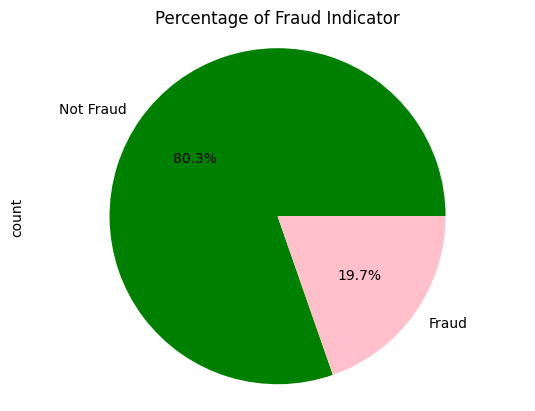

In [12]:
# percentage of fraud and not fraud
print(df['Fraud_indicator'].value_counts())
df['Fraud_indicator'].value_counts().plot(kind ='pie',
                                         autopct ='%1.1f%%',
                                         colors = ['green','pink'])
plt.title("Percentage of Fraud Indicator")
plt.axis('equal')
plt.show( )

### 2.1 Analyse diffent Cloumns
analyse on the bases of Type

In [13]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64

Text(0.5, 1.0, 'Vehicle Type')

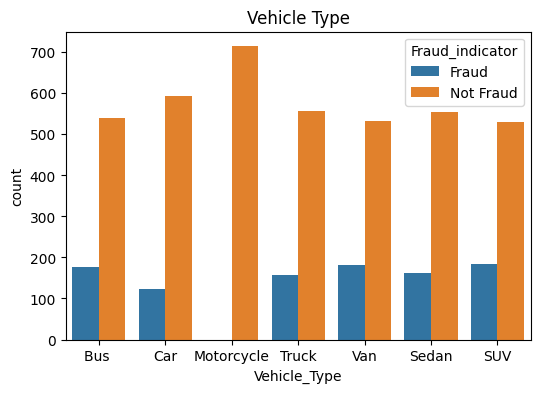

In [14]:
## on the bases on Vehicle type
plt.figure(figsize=(6,4))
sns.countplot(x='Vehicle_Type',data=df,hue='Fraud_indicator').set_title('Vehicle Type')

Text(0.5, 1.0, 'TollBoothID')

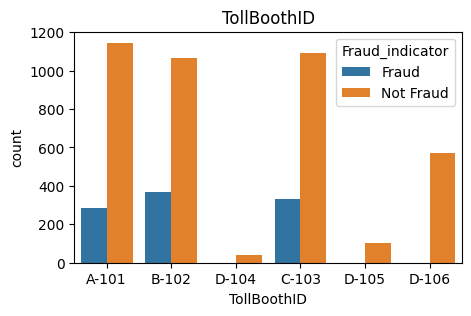

In [15]:
## on the bases toll booth ID
plt.figure(figsize=(5,3))
sns.countplot(x='TollBoothID',data=df,hue='Fraud_indicator').set_title('TollBoothID')

Text(0.5, 1.0, 'Vehicle Dimension')

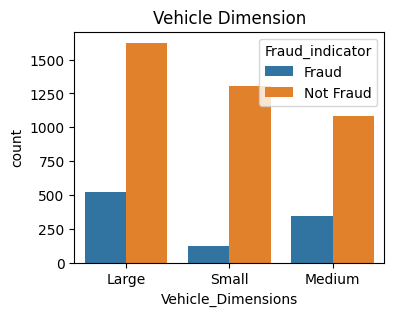

In [16]:
# vehicle Dimension
plt.figure(figsize=(4,3))
sns.countplot(x='Vehicle_Dimensions',data=df,hue='Fraud_indicator').set_title('Vehicle Dimension')

Text(0.5, 1.0, 'Lane Type')

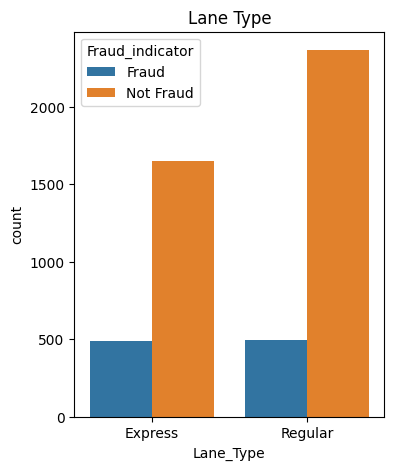

In [17]:
#Lane Type
plt.figure(figsize=(4,5))
sns.countplot(x='Lane_Type',data=df,hue='Fraud_indicator').set_title('Lane Type')

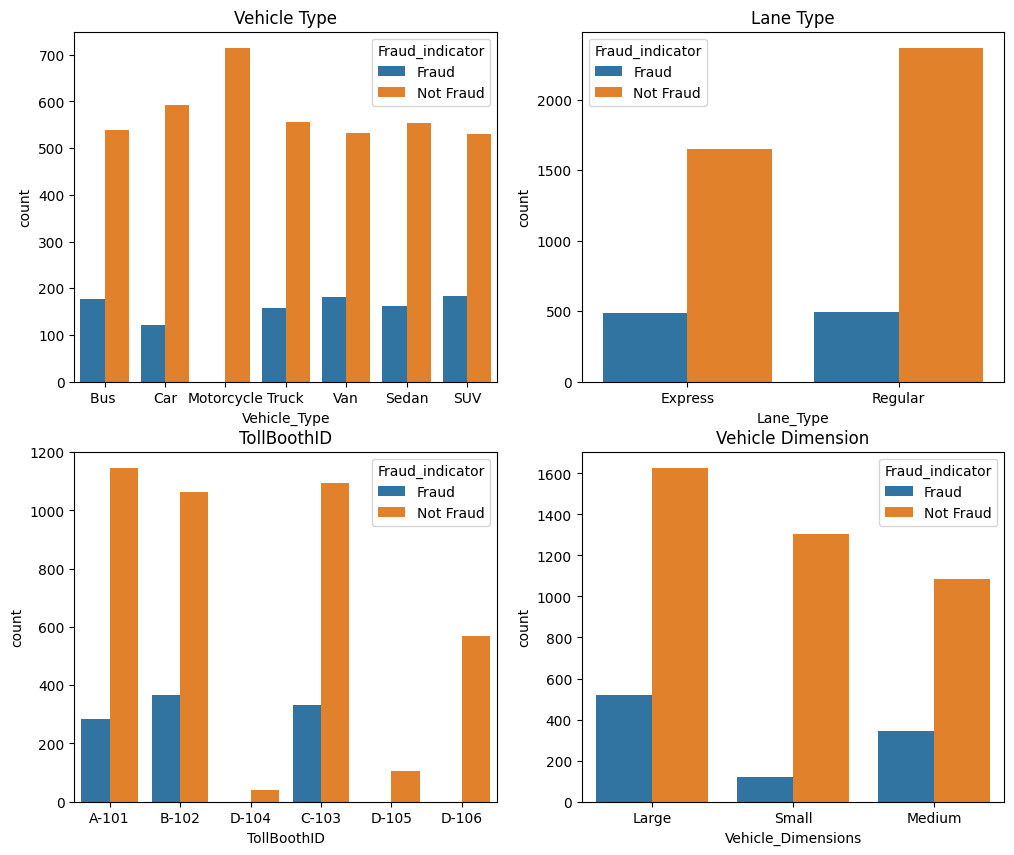

<Figure size 600x400 with 0 Axes>

<Figure size 400x500 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

In [18]:
# combing all graphs together
fig,axes=plt.subplots(2,2, figsize=(12,10))
## on the bases on Vehicle type
plt.figure(figsize=(6,4))
sns.countplot(x='Vehicle_Type',data=df,hue='Fraud_indicator',
             ax=axes[0,0]).set_title('Vehicle Type')
plt.figure(figsize=(4,5))
sns.countplot(x='Lane_Type',data=df,hue='Fraud_indicator', ax=axes[0,1]).set_title('Lane Type')

# vehicle Dimension
plt.figure(figsize=(4,3))
sns.countplot(x='Vehicle_Dimensions',data=df,hue='Fraud_indicator', ax=axes[1,1]).set_title('Vehicle Dimension')
## on the bases toll booth ID
plt.figure(figsize=(5,3))
sns.countplot(x='TollBoothID',data=df,hue='Fraud_indicator', ax=axes[1,0]).set_title('TollBoothID')

plt.tight_layout()


### observation 2
1. Motorcycle are clean - not involved in the Fraud
2. toll both 104,105 and 106 have no fruad detected but 101,102,103 have mix data.
3. Express way has a higher fruad percentage based on vehicles than regular ways
4. Small vehicles has very minimal involvement

#### distribution of transaction amount


In [19]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


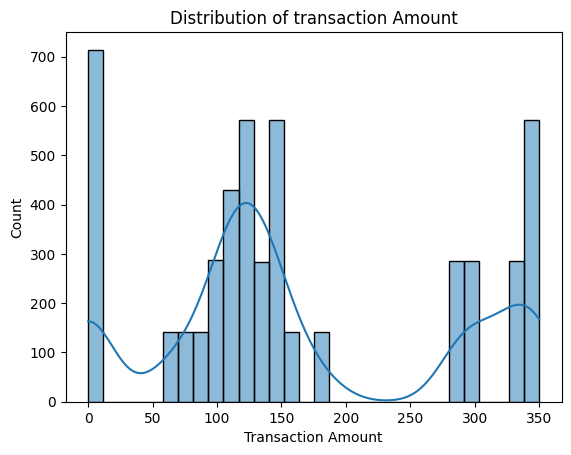

In [20]:
sns.histplot(df['Transaction_Amount'],bins=30,kde = True)
## kde is trend line
plt.title("Distribution of transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()


#### distribution of Amount Paid

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


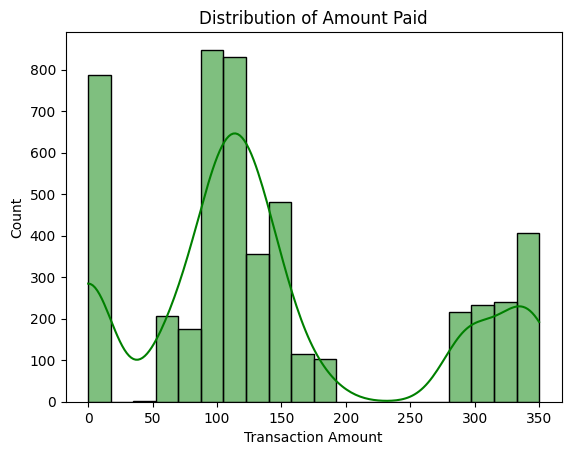

In [21]:
sns.histplot(df['Amount_paid'],bins=20, kde= True, color='green', edgecolor='black')
plt.title("Distribution of Amount Paid")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

#### distribution of Vehicle Speed

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


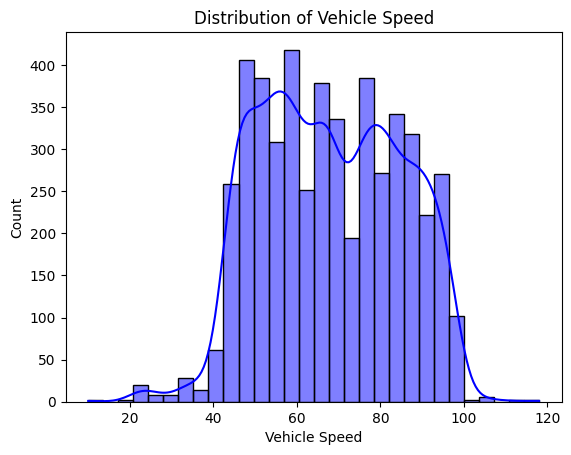

In [22]:
sns.histplot(df['Vehicle_Speed'],bins=30, kde= True, color='blue', edgecolor='black')
plt.title("Distribution of Vehicle Speed")
plt.xlabel("Vehicle Speed")
plt.ylabel("Count")
plt.show()

#### Relationship btw Transaction amount and Paid amount

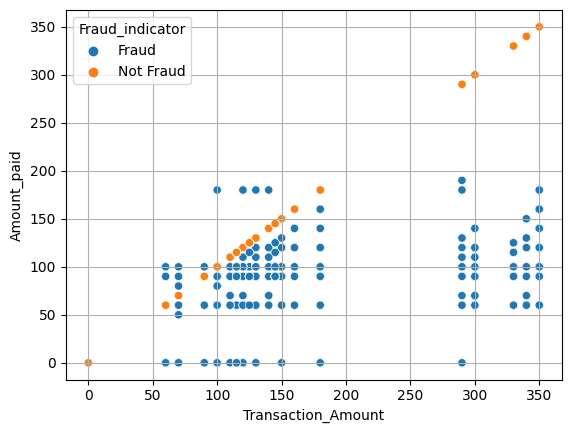

In [23]:
sns.scatterplot(x='Transaction_Amount', y='Amount_paid', hue='Fraud_indicator', data =df)
plt.grid()

### Observation 3
1. when transaction amount is not equal to  amount paid==> Fraud
2. when transaction Amount is equal to Amount Paid ==> Not Fraud

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

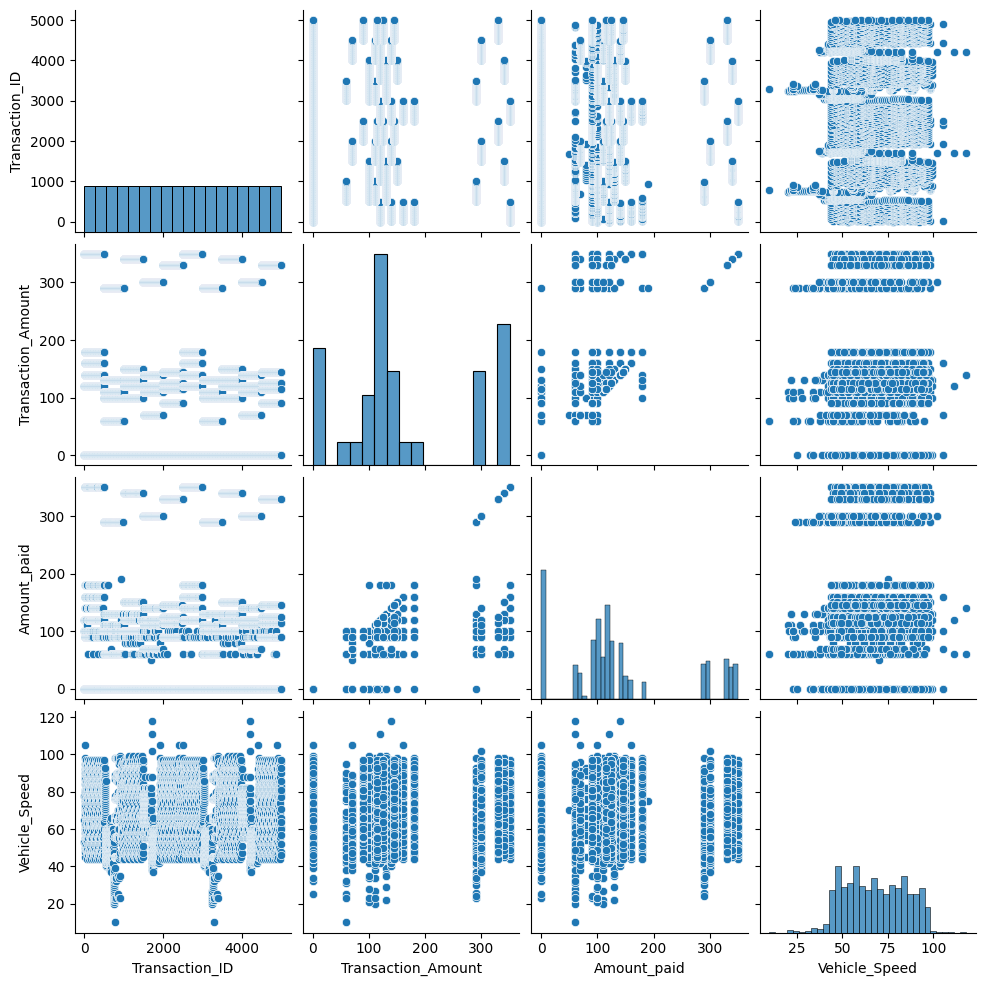

In [24]:
## pair plot#
sns.pairplot(df)

# 3. Feature Extraction

In [25]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [26]:
df['FastagID'].mode()[0]

'FTG-000-QAZ-210'

In [27]:
df['State_code'] = df['Vehicle_Plate_Number'].str[:2]
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,State_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,KA


In [28]:
## remove vehicle number plate feature
df = df.drop('Vehicle_Plate_Number',axis = 1)

In [29]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,State_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,KA


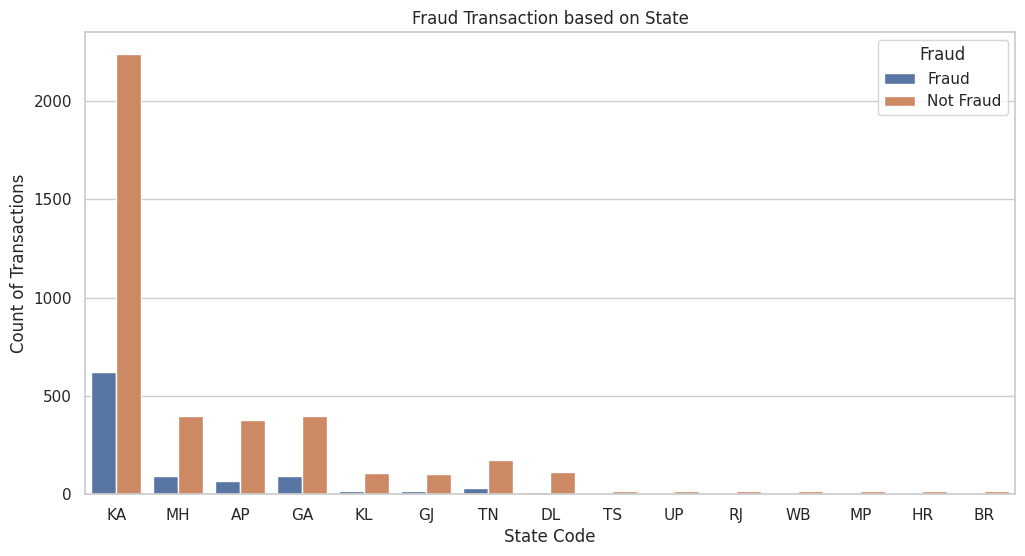

In [30]:
# visulize fraud based on State
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x='State_code', data=df, hue='Fraud_indicator')
plt.title('Fraud Transaction based on State')
plt.xlabel('State Code')
plt.ylabel('Count of Transactions')

plt.legend(title='Fraud')
plt.show()

In [31]:
df['State_code'].value_counts()

State_code
KA    2860
GA     489
MH     488
AP     447
TN     203
DL     123
KL     121
GJ     119
TS      22
UP      22
RJ      22
WB      21
MP      21
HR      21
BR      21
Name: count, dtype: int64

In [32]:
df.loc[df['Fraud_indicator']=='Fraud','State_code'].value_counts()

State_code
KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: count, dtype: int64

#### obsevation 4
1. highest Fraud count is in KA

In [33]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,State_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,KA


In [34]:
#analyse timestamp to get the fraud /not fraund based on days
df['Timestamp']

0        1/6/2023 11:20
1        1/7/2023 14:55
2        1/8/2023 18:25
3         1/9/2023 2:05
4        1/10/2023 6:35
             ...       
4995     1/1/2023 22:18
4996    1/17/2023 13:43
4997      2/5/2023 5:08
4998    2/20/2023 20:34
4999     3/10/2023 0:59
Name: Timestamp, Length: 5000, dtype: object

In [35]:
#convert timestamp into data frame
df['Timestamp']= pd.to_datetime(df['Timestamp'])

In [36]:
df['Hour']=df['Timestamp'].dt.hour
df['DayOfWeek']=df['Timestamp'].dt.dayofweek
df['Month']=df['Timestamp'].dt.month

In [37]:
#drop timestamp feature
df=df.drop('Timestamp', axis=1)

In [38]:
df['DayOfWeek'].value_counts()

DayOfWeek
6    743
1    728
0    716
4    713
5    709
2    697
3    694
Name: count, dtype: int64

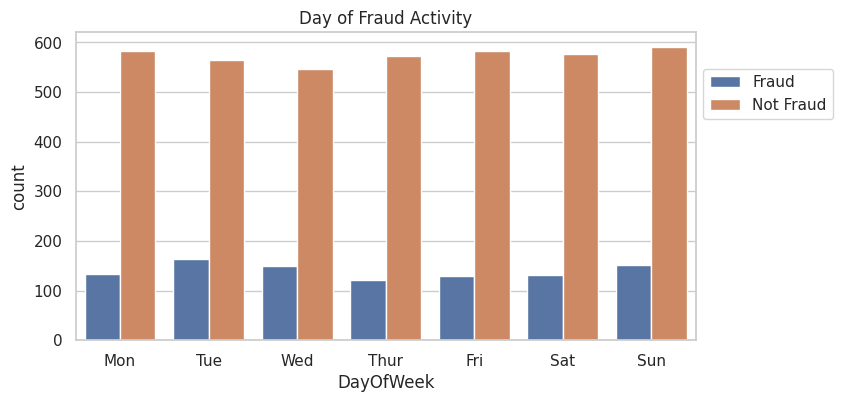

In [39]:
#visualise based on days
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='DayOfWeek', hue= 'Fraud_indicator')
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

plt.title('Day of Fraud Activity')
plt.legend(loc='center left', bbox_to_anchor=(1,0.8))
plt.show()

## Correlation Matrix

In [40]:
numericalDf=df.select_dtypes('number')

In [41]:
corr_matrix=numericalDf.corr()
corr_matrix

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,DayOfWeek,Month
Transaction_ID,1.000000,-0.023515,0.044433,0.014378,-0.023208,0.002446,0.260075
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229,-0.036980,-0.001813,-0.019824
Amount_paid,0.044433,0.870078,1.000000,0.039027,-0.026358,-0.002960,0.018105
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000,-0.002259,-0.017608,0.015349
Hour,-0.023208,-0.036980,-0.026358,-0.002259,1.000000,-0.010292,0.001041
DayOfWeek,0.002446,-0.001813,-0.002960,-0.017608,-0.010292,1.000000,0.002552
Month,0.260075,-0.019824,0.018105,0.015349,0.001041,0.002552,1.000000


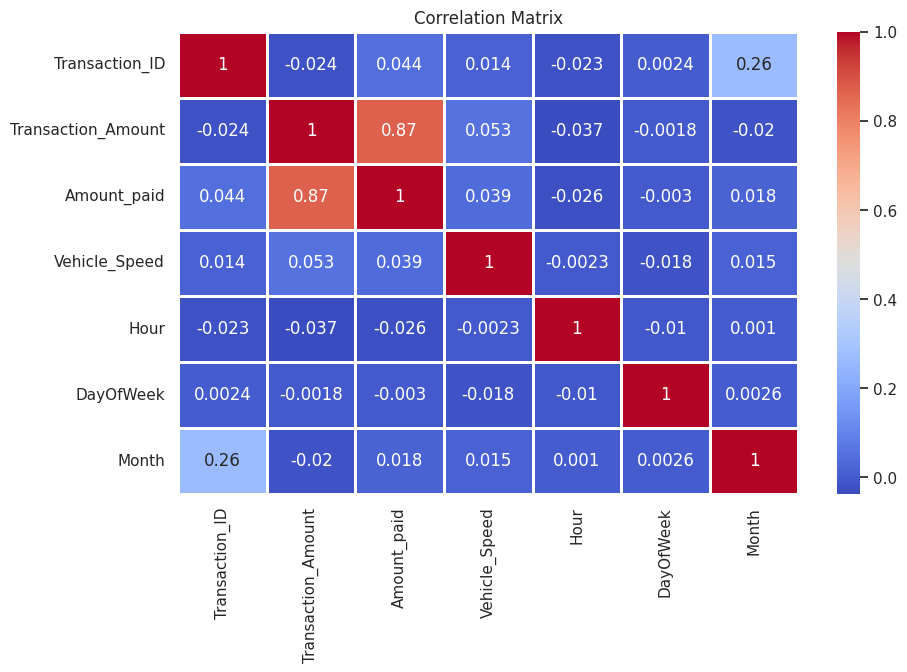

In [42]:
#plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidth=1)
plt.title("Correlation Matrix")
plt.show()

In [43]:
df.columns

Index(['Transaction_ID', 'Vehicle_Type', 'FastagID', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Fraud_indicator',
       'State_code', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

In [44]:
#remove unnecessary columns
df.drop(['Transaction_ID','FastagID','Geographical_Location'], axis= 1, inplace = True)
# another way is -> 
# df = df.drop(['Transaction_ID','FastagID','Geographical_Location'], axis= 1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle_Type        5000 non-null   object
 1   TollBoothID         5000 non-null   object
 2   Lane_Type           5000 non-null   object
 3   Vehicle_Dimensions  5000 non-null   object
 4   Transaction_Amount  5000 non-null   int64 
 5   Amount_paid         5000 non-null   int64 
 6   Vehicle_Speed       5000 non-null   int64 
 7   Fraud_indicator     5000 non-null   object
 8   State_code          5000 non-null   object
 9   Hour                5000 non-null   int32 
 10  DayOfWeek           5000 non-null   int32 
 11  Month               5000 non-null   int32 
dtypes: int32(3), int64(3), object(6)
memory usage: 410.3+ KB


In [46]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [47]:
objectColumns=['Vehicle_Type','Lane_Type','TollBoothID','Vehicle_Dimensions','State_code','Fraud_indicator']
label_encoder={}

for column in objectColumns:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    label_encoder[column]=le
    
# le.fit_transform(df['Vehicle_Type'])

In [48]:
df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,State_code,Hour,DayOfWeek,Month
0,0,0,0,0,350,120,65,0,6,11,4,1
1,1,1,1,2,120,100,78,0,6,14,5,1
2,2,3,1,2,0,0,53,1,6,18,6,1
3,5,2,1,0,350,120,92,0,6,2,0,1
4,6,1,0,1,140,100,60,0,6,6,1,1


In [49]:
label_encoder

{'Vehicle_Type': LabelEncoder(),
 'Lane_Type': LabelEncoder(),
 'TollBoothID': LabelEncoder(),
 'Vehicle_Dimensions': LabelEncoder(),
 'State_code': LabelEncoder(),
 'Fraud_indicator': LabelEncoder()}

In [50]:
label_encoder['Lane_Type'].classes_

array(['Express', 'Regular'], dtype=object)

# Model Training


In [51]:
X= df.drop(columns=['Fraud_indicator'])
y= df['Fraud_indicator']

In [52]:
# split the x and y in train and testing
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [53]:
print("X_train : ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (3500, 11)
X_test:  (1500, 11)
y_train :  (3500,)
y_test :  (1500,)


#### Logistic Regression Model

In [54]:
#improt model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model

LogisticRegression()

In [55]:
# fit the model 
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
#predict
y_pred=lr_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

### Model Evaluation 

In [57]:
#import  libraries for Matrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,f1_score,  confusion_matrix



In [58]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)
precesion= precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1=f1_score(y_test, y_pred)

print("LR model results : \n")
print("Accuracy : ", accuracy)
print("\n Confusion Matrix  : \n ", conf_matrix)
print("\n Precision : ", precesion)
print("\n Recall : ", recall )
print("\n F1 : ", f1)


LR model results : 

Accuracy :  0.9826666666666667

 Confusion Matrix  : 
  [[ 301   26]
 [   0 1173]]

 Precision :  0.9783152627189324

 Recall :  1.0

 F1 :  0.9890387858347386


In [59]:
# classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       327
           1       0.98      1.00      0.99      1173

    accuracy                           0.98      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



In [60]:
#funciton to evaluate model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    precision=precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    
   
    print("Accuracy: ", accuracy)
    print("\nConfusion Matrix\n", conf_matrix)
    print("\nPrecision : ", precision)
    print("\nRECALL: ", recall)
    print("\nF1 Score: ", f1)

In [61]:
# testing all model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree_model =  DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_tree_pred= tree_model.predict(X_test)
y_tree_pred

array([1, 1, 1, ..., 1, 1, 1])

# Decision Tree


In [63]:

#Accuacy of Decision Tree
print("Decision Tree Model evaluation: \n")
evaluate_model(y_test, y_tree_pred)

Decision Tree Model evaluation: 

Accuracy:  0.9986666666666667

Confusion Matrix
 [[ 325    2]
 [   0 1173]]

Precision :  0.9982978723404256

RECALL:  1.0

F1 Score:  0.9991482112436115


# Random Forest#

In [64]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_y_pred= rf_model.predict(X_test)

#accuracy
print("Random Forest Model Accuracy :\n")
evaluate_model(y_test, rf_y_pred)

Random Forest Model Accuracy :

Accuracy:  0.9846666666666667

Confusion Matrix
 [[ 304   23]
 [   0 1173]]

Precision :  0.9807692307692307

RECALL:  1.0

F1 Score:  0.9902912621359222


# Support Vector Machine

In [65]:
from sklearn.svm import SVC
svc_model= SVC()
svc_model.fit(X_train, y_train)

SVC()

In [66]:
svc_y_pred = svc_model.predict(X_test)
#accuracy
print("Support Vector Machine Accuracy :\n")
evaluate_model(y_test, svc_y_pred)


Support Vector Machine Accuracy :

Accuracy:  0.9793333333333333

Confusion Matrix
 [[ 296   31]
 [   0 1173]]

Precision :  0.9742524916943521

RECALL:  1.0

F1 Score:  0.9869583508624316


# KNN


In [67]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors = 3)
knnModel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
knn_y_pred = knnModel.predict(X_test)
#accuracy
print("KNN Classifier Model evaluation: \n")
evaluate_model(y_test, knn_y_pred)


KNN Classifier Model evaluation: 

Accuracy:  0.9873333333333333

Confusion Matrix
 [[ 308   19]
 [   0 1173]]

Precision :  0.9840604026845637

RECALL:  1.0

F1 Score:  0.9919661733615222


Text(0.5, 1.0, ' Comparison of Accuracy of Diff Model')

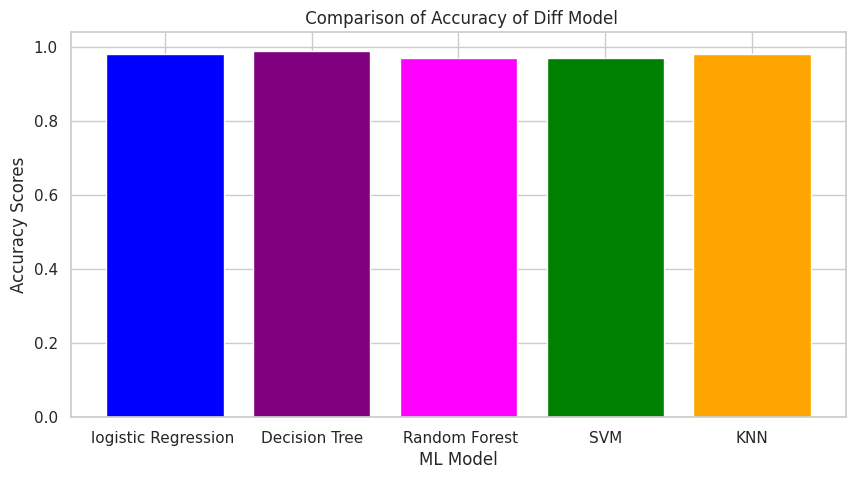

In [69]:
# lets Visualise Models

models= ['logistic Regression ', 'Decision Tree', ' Random Forest', 'SVM', 'KNN']
accuracy_scores= [0.98, 0.99,0.97,0.97,0.98]
colors=['blue', 'purple', 'magenta', 'green', 'orange']
plt.figure(figsize=(10,5))

plt.bar(models,accuracy_scores,color=colors)
plt.xlabel("ML Model")
plt.ylabel("Accuracy Scores")
plt.title(" Comparison of Accuracy of Diff Model")

# Conclusion 
1. Decision Tree
-> Highest accuracy (99%)
-> overall top performing model


# OPTIONAL CODE

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
rf_params={"max_depth":[5,8,15,20,None],
           "max_features": [5,6,7,"auto"],
           "min_samples_split":[2,8,15],
           "n_estimators" : [100,200,500] }

In [72]:
randomcv_models= [("RF", RandomForestClassifier(),rf_params)]
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, 20, None],
   'max_features': [5, 6, 7, 'auto'],
   'min_samples_split': [2, 8, 15],
   'n_estimators': [100, 200, 500]})]

In [73]:
model_params ={}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                      param_distributions=params,
                      n_iter = 20,
                      cv = 3,
                      verbose = 2, 
                      n_jobs = 1)
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=6, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=6, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=6, min_samples_split=8, n_estimators=200; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=500; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=500; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=500; total time=   1.5s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, ma

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=500; total time=   1.8s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=500; total time=   1.8s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=500; total time=   1.7s
[CV] END max_depth=15, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=6, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=6, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=6, min_samples_split=8, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=500; total time=   1.7s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=500; total time=   1.6s
[CV] END max_depth=8, max_features=6, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=8, max_features=6, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=8, max_features=6, min_samples_split=2, n_estimators=200; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.6s


In [74]:
model_params

{'RF': {'n_estimators': 200,
  'min_samples_split': 2,
  'max_features': 6,
  'max_depth': None}}

In [75]:
rf_model_2= RandomForestClassifier(n_estimators= 500,
  min_samples_split= 2,
  max_features=7,
  max_depth= None )

rf_model_2.fit(X_train,y_train)

RandomForestClassifier(max_features=7, n_estimators=500)

In [76]:
rf_y_pred2=rf_model_2.predict(X_test)

print("RF Model Evaluation:")
evaluate_model(y_test,rf_y_pred2)

RF Model Evaluation:
Accuracy:  0.9973333333333333

Confusion Matrix
 [[ 323    4]
 [   0 1173]]

Precision :  0.9966015293118097

RECALL:  1.0

F1 Score:  0.9982978723404256


Random Forest Model Accuracy :

Accuracy:  0.984

Confusion Matrix
 [[ 303   24]
 [   0 1173]]

Precision :  0.9799498746867168

RECALL:  1.0

F1 Score:  0.9898734177215189

------- AFTER SELECTING PARAMETERS--------

RF Model Evaluation:
Accuracy:  0.9973333333333333

Confusion Matrix
 [[ 323    4]
 [   0 1173]]

Precision :  0.9966015293118097

RECALL:  1.0

F1 Score:  0.9982978723404256 